# Рекомендательная система под бизнес задачу (ритейл)

## Продуктовые рекомендации

#### Давайте сначала разберемся что такое рекомендательная система и как можно реализовать её под ритейл.
##### Человек приходит в оффлайн и онлайн-магазины, как правило, за определенным товаром. Как подтолкнуть его к новым покупкам? Самый простой путь ─ предложить ему дополнительные товары, но если советовать все подряд, есть риск потерять посетителя из-за навязчивости. Однако, если не предложить ничего, то меньше шансы продать покупателю дополнительные товары или привлечь его в магазин снова.
##### Найти «золотую середину» помогают рекомендательные системы. Рекомендательные системы ─ это специальные алгоритмы, которые предлагают пользователю товары, подходящие ему по тем или иным критериям.
##### Примеры рекомендаций в интернет-магазинах:
##### 1. На основе фильтрации: “Похожие товары”
##### 2. Экспертные рекомендации
##### 3. Рекомендации на основе анализа данных
##### 

#### Рекомендательные системы: польза для покупателя и продавца
##### Выгоды продавца очевидны, в первую очередь это:
##### 1. Увеличение лояльности покупателей через подходящие, а не назойливые рекомендации;
##### 2. Повышение выручки за счет повторных покупок и продаж сопутствующих товаров;
##### 3. Понимание целевой аудитории, что помогает более точно использовать маркетинговые инструменты.
#####
##### Но и покупатель тоже выигрывает от использования рекомендаций. Самостоятельный выбор требует много времени: нужно подобрать подходящие варианты, 
##### сравнить их между собой и найти самый лучший.
#####
##### Разработка подобных решений требует определенных инвестиций, однако, в конечном итоге они окупаются за счет роста прибыли.

In [ ]:
Импорт зависимостей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Чтение данных

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [ ]:
Объединение наборов данных

In [3]:
order = order_train.merge(orders, on=['order_id'], how = 'inner')
order = order.merge(products, on=['product_id'], how = 'inner')
order = order.merge(aisles, on=['aisle_id'], how = 'inner')
order_df = order.merge(departments, on=['department_id'], how = 'inner')
order_df.head()

order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1    816049       49302                  7          1    47901    train   
2   1242203       49302                  1          1     2993    train   
3   1383349       49302                 11          1    41425    train   
4   1787378       49302                  8          0   187205    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             4          4                 10                     9.0   
1            14          4                  6                    16.0   
2            15          0                  7                     7.0   
3             4          3                  8                    14.0   
4             5          4                 14                    30.0   

       product_name  aisle_id  department_id   aisle  department  
0  Bulgarian Yogurt       120             16  yogurt  dairy eggs  
1  Bulgarian Yogurt       120             16  yogurt  dairy eggs  
2  Bulgarian Yogurt       120             16  yogurt  dairy eggs  
3  Bulgarian Yogurt       120             16  yogurt  dairy eggs  
4  Bulgarian Yogurt       120             16  yogurt  dairy eggs

In [ ]:
Данные по бананам 

In [ ]:
hello = order_df[order_df['product_name']=='Banana']
hello[hello['reordered']==1][15:]

In [ ]:
Так можно посмотреть покупки пользователя 163282

In [ ]:
order_df[order_df['user_id']==163282]

In [ ]:
Создание поддельного адреса электронной почты для идентификатора пользователя

In [4]:
user = orders['user_id'].unique()
user_df = pd.DataFrame(user, columns = ['user_id'])
user_df['email'] = [f'user_{user}@gmail.com' for user in user_df['user_id']]
user_df.head()

user_id             email
0        1  user_1@gmail.com
1        2  user_2@gmail.com
2        3  user_3@gmail.com
3        4  user_4@gmail.com
4        5  user_5@gmail.com

In [ ]:
Удаление столбцов, которые не нужны

In [5]:
order_df = order_df.drop(columns = ['eval_set', 'order_number','order_dow'], axis =1)
order_df.head()

order_id  product_id  add_to_cart_order  reordered  user_id  \
0         1       49302                  1          1   112108   
1    816049       49302                  7          1    47901   
2   1242203       49302                  1          1     2993   
3   1383349       49302                 11          1    41425   
4   1787378       49302                  8          0   187205   

   order_hour_of_day  days_since_prior_order      product_name  aisle_id  \
0                 10                     9.0  Bulgarian Yogurt       120   
1                  6                    16.0  Bulgarian Yogurt       120   
2                  7                     7.0  Bulgarian Yogurt       120   
3                  8                    14.0  Bulgarian Yogurt       120   
4                 14                    30.0  Bulgarian Yogurt       120   

   department_id   aisle  department  
0             16  yogurt  dairy eggs  
1             16  yogurt  dairy eggs  
2             16  yogurt  dairy eggs  
3             16  yogurt  dairy eggs  
4             16  yogurt  dairy eggs

In [ ]:
Проверка, есть ли постоянные клиенты
Группа по пользователю, идентификатору продукта и названию продукта
Уникальные значения в Count равны 1, что означает, что этот набор данных относится к уникальным клиентам.

In [6]:
top_user = order_df.groupby(['user_id','product_id','product_name']).size().reset_index(name = "count")
top_user = pd.DataFrame(top_user)
len(pd.unique(top_user['count']))

1

In [7]:
print( len(pd.unique(order_df['aisle'])), len(pd.unique(order_df['department'])), len(pd.unique(order_df['product_id'])))

134 21 39123


In [ ]:
Чтобы иметь кластер, который работает быстро без достаточного количества функций, мы сосредоточимся на проходах

## Лучшие продукты за проход

In [8]:
top_aisle = order_df.groupby(['aisle_id','aisle','product_id','product_name']).size().reset_index(name = "count")
top_aisle = pd.DataFrame(top_aisle)
top_aisle.head()

aisle_id                  aisle  product_id  \
0         1  prepared soups salads         209   
1         1  prepared soups salads         554   
2         1  prepared soups salads         886   
3         1  prepared soups salads        1600   
4         1  prepared soups salads        2539   

                                        product_name  count  
0                                Italian Pasta Salad      8  
1                                       Turkey Chili     56  
2  Whole Grain Salad with Roasted Pecans & Mango ...      1  
3                           Mediterranean Orzo Salad      5  
4                              Original Potato Salad     33

# ТОП-3

In [9]:
# Сортировка по убыванию
top_aisle = top_aisle.sort_values(by='count', ascending = False)
# Сортировка по возрастанию на проходе
top_aisle = top_aisle.sort_values(by='aisle_id')
# Получить уникальный список aisle_id
unique_aisle = pd.unique(top_aisle['aisle_id'])
# Получить начальный фрейм данных для concat
inital_df = top_aisle.loc[top_aisle['aisle_id'] == unique_aisle[0]].nlargest(3, columns='count')
# Цикл for, чтобы объединить 3 лучших продукта каждого прохода
for i in range(1,len(unique_aisle)):
    top_3 = top_aisle.loc[top_aisle['aisle_id'] == unique_aisle[i]].nlargest(3, columns='count')
    inital_df = pd.concat([inital_df,top_3])
top3_aisle = inital_df
top3_aisle.head()

aisle_id                  aisle  product_id  \
61          1  prepared soups salads       26047   
57          1  prepared soups salads       25199   
50          1  prepared soups salads       22281   
293         2      specialty cheeses       37524   
194         2      specialty cheeses       13409   

                      product_name  count  
61                      Tuna Salad    208  
57           Classic Chicken Salad    200  
50             Chicken Noodle Soup    165  
293          Fresh Mozzarella Ball    450  
194  Dubliner Wedge Pre Cut Cheese    253

#### Список повторных покупок

In [10]:
reorder = order_df[order_df['reordered']==1]
reorder_df = reorder[['product_id', 'user_id', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department']]
reorder_df.head()

product_id  user_id      product_name  aisle_id  department_id   aisle  \
0       49302   112108  Bulgarian Yogurt       120             16  yogurt   
1       49302    47901  Bulgarian Yogurt       120             16  yogurt   
2       49302     2993  Bulgarian Yogurt       120             16  yogurt   
3       49302    41425  Bulgarian Yogurt       120             16  yogurt   
5       49302   199120  Bulgarian Yogurt       120             16  yogurt   

   department  
0  dairy eggs  
1  dairy eggs  
2  dairy eggs  
3  dairy eggs  
5  dairy eggs

## Модель (K-Means)

Преобразование таблицы в процент покупок в проходе для пользователя, рассчёт процент пользователей
И объединение этих двух наборов данных подсчета и суммирования для рассчёта процента прохода

In [11]:
percent_user = order_df.groupby(['user_id','aisle_id','aisle']).size().reset_index(name='count')
sum_userproduct = percent_user.groupby(['user_id'])['count'].sum().reset_index(name='sum')

percent_user = percent_user.merge(sum_userproduct, on='user_id')
percent_user['percent'] = percent_user['count']/percent_user['sum']
percent_user.head()

user_id  aisle_id            aisle  count  sum   percent
0        1        21  packaged cheese      1   11  0.090909
1        1        23    popcorn jerky      1   11  0.090909
2        1        45  candy chocolate      1   11  0.090909
3        1        53            cream      1   11  0.090909
4        1        54      paper goods      1   11  0.090909

#### Создание таблицы процентов прохода продукта пользователя

In [12]:
percent_df = pd.pivot_table(percent_user, values='percent', index='user_id', columns = 'aisle', fill_value = 0 )
percent_df = percent_df.sort_index()
percent_df.head()

aisle    air fresheners candles  asian foods  baby accessories  \
user_id                                                          
1                      0.000000     0.000000               0.0   
2                      0.000000     0.000000               0.0   
5                      0.111111     0.222222               0.0   
7                      0.000000     0.000000               0.0   
8                      0.000000     0.000000               0.0   

aisle    baby bath body care  baby food formula  bakery desserts  \
user_id                                                            
1                        0.0                0.0              0.0   
2                        0.0                0.0              0.0   
5                        0.0                0.0              0.0   
7                        0.0                0.0              0.0   
8                        0.0                0.0              0.0   

aisle    baking ingredients  baking supplies decor  beauty  beers coolers  \
user_id                                                                     
1                  0.000000                    0.0     0.0            0.0   
2                  0.000000                    0.0     0.0            0.0   
5                  0.000000                    0.0     0.0            0.0   
7                  0.111111                    0.0     0.0            0.0   
8                  0.000000                    0.0     0.0            0.0   

aisle    ...  spreads  tea  tofu meat alternatives  tortillas flat bread  \
user_id  ...                                                               
1        ...      0.0  0.0                0.000000              0.000000   
2        ...      0.0  0.0                0.000000              0.000000   
5        ...      0.0  0.0                0.000000              0.000000   
7        ...      0.0  0.0                0.000000              0.000000   
8        ...      0.0  0.0                0.055556              0.055556   

aisle    trail mix snack mix  trash bags liners  vitamins supplements  \
user_id                                                                 
1                        0.0                0.0                   0.0   
2                        0.0                0.0                   0.0   
5                        0.0                0.0                   0.0   
7                        0.0                0.0                   0.0   
8                        0.0                0.0                   0.0   

aisle    water seltzer sparkling water  white wines    yogurt  
user_id                                                        
1                                  0.0          0.0  0.090909  
2                                  0.0          0.0  0.000000  
5                                  0.0          0.0  0.000000  
7                                  0.0          0.0  0.000000  
8                                  0.0          0.0  0.000000  

[5 rows x 134 columns]

In [43]:
df = percent_df.reset_index(drop=False)
df.head()

aisle  user_id  air fresheners candles  asian foods  baby accessories  \
0            1                0.000000     0.000000               0.0   
1            2                0.000000     0.000000               0.0   
2            5                0.111111     0.222222               0.0   
3            7                0.000000     0.000000               0.0   
4            8                0.000000     0.000000               0.0   

aisle  baby bath body care  baby food formula  bakery desserts  \
0                      0.0                0.0              0.0   
1                      0.0                0.0              0.0   
2                      0.0                0.0              0.0   
3                      0.0                0.0              0.0   
4                      0.0                0.0              0.0   

aisle  baking ingredients  baking supplies decor  beauty  ...  spreads  tea  \
0                0.000000                    0.0     0.0  ...      0.0  0.0   
1                0.000000                    0.0     0.0  ...      0.0  0.0   
2                0.000000                    0.0     0.0  ...      0.0  0.0   
3                0.111111                    0.0     0.0  ...      0.0  0.0   
4                0.000000                    0.0     0.0  ...      0.0  0.0   

aisle  tofu meat alternatives  tortillas flat bread  trail mix snack mix  \
0                    0.000000              0.000000                  0.0   
1                    0.000000              0.000000                  0.0   
2                    0.000000              0.000000                  0.0   
3                    0.000000              0.000000                  0.0   
4                    0.055556              0.055556                  0.0   

aisle  trash bags liners  vitamins supplements  water seltzer sparkling water  \
0                    0.0                   0.0                            0.0   
1                    0.0                   0.0                            0.0   
2                    0.0                   0.0                            0.0   
3                    0.0                   0.0                            0.0   
4                    0.0                   0.0                            0.0   

aisle  white wines    yogurt  
0              0.0  0.090909  
1              0.0  0.000000  
2              0.0  0.000000  
3              0.0  0.000000  
4              0.0  0.000000  

[5 rows x 135 columns]

1

2

3

4

5

6

7

8

9

10

11


ValueError: x and y must have same first dimension, but have shapes (14,) and (11,)

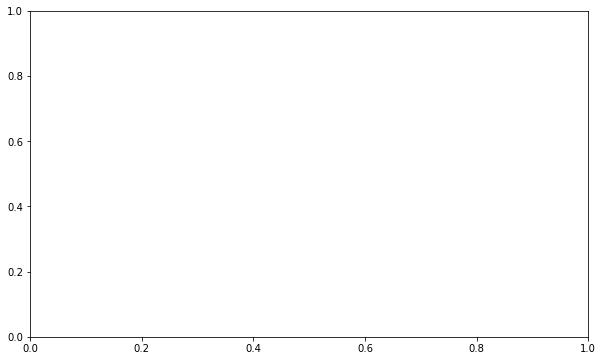

In [23]:
from sklearn.cluster import KMeans

distortions = []
for k in range(1,12):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(percent_df)
    distortions.append(kmeanModel.inertia_)
    print(k)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,12), distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

#### Искажение графика для определения локтя/оптимального значения k. 
#### Локоть около 6, поэтому мы будем использовать 6 для количества кластеров.

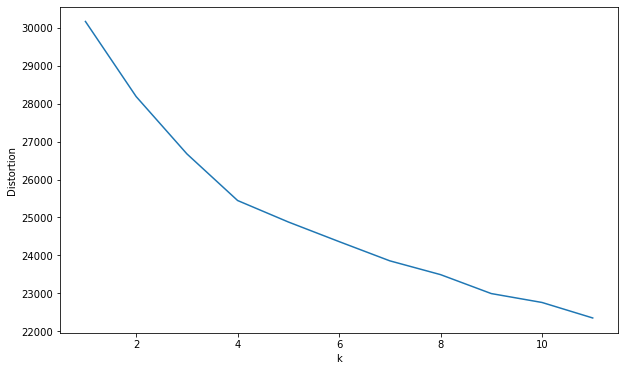

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12), distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
Подгонка модели k-mean с 6 кластерами и извлечение меток кластера для строк

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6).fit(percent_df)
cluster_label = kmeans.labels_
percent_ct = pd.pivot_table(percent_user, values='count', index='user_id', columns = 'aisle', fill_value = 0 )
# Добавление метки кластера в фреймворк данных, чтобы идентифицировать клиентский сегмент
percent_ct['cluster'] = cluster_label
# Просмотр:
percent_ct.head()

aisle    air fresheners candles  asian foods  baby accessories  \
user_id                                                          
1                             0            0                 0   
2                             0            0                 0   
5                             1            2                 0   
7                             0            0                 0   
8                             0            0                 0   

aisle    baby bath body care  baby food formula  bakery desserts  \
user_id                                                            
1                          0                  0                0   
2                          0                  0                0   
5                          0                  0                0   
7                          0                  0                0   
8                          0                  0                0   

aisle    baking ingredients  baking supplies decor  beauty  beers coolers  \
user_id                                                                     
1                         0                      0       0              0   
2                         0                      0       0              0   
5                         0                      0       0              0   
7                         1                      0       0              0   
8                         0                      0       0              0   

aisle    ...  tea  tofu meat alternatives  tortillas flat bread  \
user_id  ...                                                      
1        ...    0                       0                     0   
2        ...    0                       0                     0   
5        ...    0                       0                     0   
7        ...    0                       0                     0   
8        ...    0                       1                     1   

aisle    trail mix snack mix  trash bags liners  vitamins supplements  \
user_id                                                                 
1                          0                  0                     0   
2                          0                  0                     0   
5                          0                  0                     0   
7                          0                  0                     0   
8                          0                  0                     0   

aisle    water seltzer sparkling water  white wines  yogurt  cluster  
user_id                                                               
1                                    0            0       1        0  
2                                    0            0       0        4  
5                                    0            0       0        4  
7                                    0            0       0        0  
8                                    0            0       0        3  

[5 rows x 135 columns]

In [27]:
user_percent = percent_ct.reset_index(drop=True)
user_percent

aisle   air fresheners candles  asian foods  baby accessories  \
0                            0            0                 0   
1                            0            0                 0   
2                            1            2                 0   
3                            0            0                 0   
4                            0            0                 0   
...                        ...          ...               ...   
131204                       0            0                 0   
131205                       0            0                 0   
131206                       0            0                 0   
131207                       0            0                 0   
131208                       0            0                 0   

aisle   baby bath body care  baby food formula  bakery desserts  \
0                         0                  0                0   
1                         0                  0                0   
2                         0                  0                0   
3                         0                  0                0   
4                         0                  0                0   
...                     ...                ...              ...   
131204                    0                  0                0   
131205                    0                  0                0   
131206                    0                  0                0   
131207                    0                  0                0   
131208                    0                  0                0   

aisle   baking ingredients  baking supplies decor  beauty  beers coolers  ...  \
0                        0                      0       0              0  ...   
1                        0                      0       0              0  ...   
2                        0                      0       0              0  ...   
3                        1                      0       0              0  ...   
4                        0                      0       0              0  ...   
...                    ...                    ...     ...            ...  ...   
131204                   0                      0       0              0  ...   
131205                   1                      0       0              0  ...   
131206                   0                      0       0              0  ...   
131207                   0                      0       0              0  ...   
131208                   0                      0       0              0  ...   

aisle   tea  tofu meat alternatives  tortillas flat bread  \
0         0                       0                     0   
1         0                       0                     0   
2         0                       0                     0   
3         0                       0                     0   
4         0                       1                     1   
...     ...                     ...                   ...   
131204    0                       0                     0   
131205    0                       0                     0   
131206    3                       0                     0   
131207    0                       0                     0   
131208    0                       0                     0   

aisle   trail mix snack mix  trash bags liners  vitamins supplements  \
0                         0                  0                     0   
1                         0                  0                     0   
2                         0                  0                     0   
3                         0                  0                     0   
4                         0                  0                     0   
...                     ...                ...                   ...   
131204                    0                  0                     0   
131205                    0                  0                     0   
131206                    0                  0              

#### Суммарное количество купленных товаров в проходе

In [28]:
cluster_summary = percent_ct.groupby('cluster').sum()
cluster_summary = cluster_summary.reset_index(drop=False)
cluster_summary.head()

aisle  cluster  air fresheners candles  asian foods  baby accessories  \
0            0                     799         2929               146   
1            1                      12           95                 5   
2            2                       0            6                 0   
3            3                      78         1776                33   
4            4                     175         2177               122   

aisle  baby bath body care  baby food formula  bakery desserts  \
0                      182               6239              820   
1                        6                149               42   
2                        0                  0               31   
3                       34               1049              154   
4                      105               5754              450   

aisle  baking ingredients  baking supplies decor  beauty  ...  spreads   tea  \
0                    6706                    712     182  ...     5455  5195   
1                     230                     14       5  ...      274   235   
2                      55                      9       0  ...       96    12   
3                    2213                    136      29  ...     1524  1055   
4                    3850                    218      70  ...     4704  2774   

aisle  tofu meat alternatives  tortillas flat bread  trail mix snack mix  \
0                        1804                  3459                  883   
1                          64                   142                   62   
2                           2                    18                   36   
3                        1339                  1571                   66   
4                        1909                  3160                  397   

aisle  trash bags liners  vitamins supplements  water seltzer sparkling water  \
0                   1091                   934                          14559   
1                     30                    49                           1106   
2                     21                     2                            332   
3                    120                   271                           3998   
4                    342                   696                          10853   

aisle  white wines  yogurt  
0              830   15723  
1               12    1199  
2                1     104  
3               84    6776  
4              152   31311  

[5 rows x 135 columns]

In [ ]:
Загрузка таблицы

In [29]:
df_unpivoted = cluster_summary.melt(id_vars=['cluster'], var_name='aisle', value_name='count')
df_unpivoted = df_unpivoted.sort_values('count', ascending = False)
df_unpivoted.head()

cluster                       aisle  count
321        3            fresh vegetables  85987
304        4                fresh fruits  81286
592        4  packaged vegetables fruits  44871
322        4            fresh vegetables  44082
802        4                      yogurt  31311

#### Вычислить сумму прохода кластера/общую сумму

In [30]:
cluster_ttl = pd.DataFrame(cluster_summary.sum(axis=1), columns=['total'])
percent_cluster=[]
for i in range(6):
    filter_df = df_unpivoted[df_unpivoted['cluster'] == i].reset_index(drop=True)
    filter_df['percent'] = filter_df['count']/cluster_ttl['total'][i]
    percent_cluster.append(filter_df)
percent_cluster = pd.concat(percent_cluster)
percent_cluster.head()

cluster             aisle  count   percent
0        0    chips pretzels  17643  0.034567
1        0   packaged cheese  17615  0.034513
2        0  fresh vegetables  16975  0.033259
3        0            yogurt  15723  0.030806
4        0      fresh fruits  14766  0.028931

## Кластеризация

##### Поиск закономерностей, предназначенный для разбиения совокупности объектов на однородные группы (кластеры) или поиска существующих структур в данных.
##### Для кластеризации массива данных (чеки, данные по программах лояльности) мы используем алгоритм K-means. 
##### Для чего это нужно компании? Чтобы лучше узнать своих клиентов. Чтобы найти индивидуальный подход к каждому клиенту, а не работать со всеми одинаково.

#### Необходимо определить 6 кластеров:

In [ ]:
Кластер 0: много свежих фруктов, за которыми следуют свежие/упакованные овощи
Кластер 1: в основном свежие овощи, за которыми следуют свежие фрукты.
Кластер 2: преимущественно фасованные овощи, за которыми следуют свежие фрукты.
Кластер 3: в основном свежие фрукты, за которыми следуют свежие овощи.
Кластер 4: Сбалансированное/равнопроходное распределение
Кластер 5: в основном проходы с газированной водой и другими напитками

<ipython-input-31-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-31-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-31-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-31-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-31-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-31-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used togeth

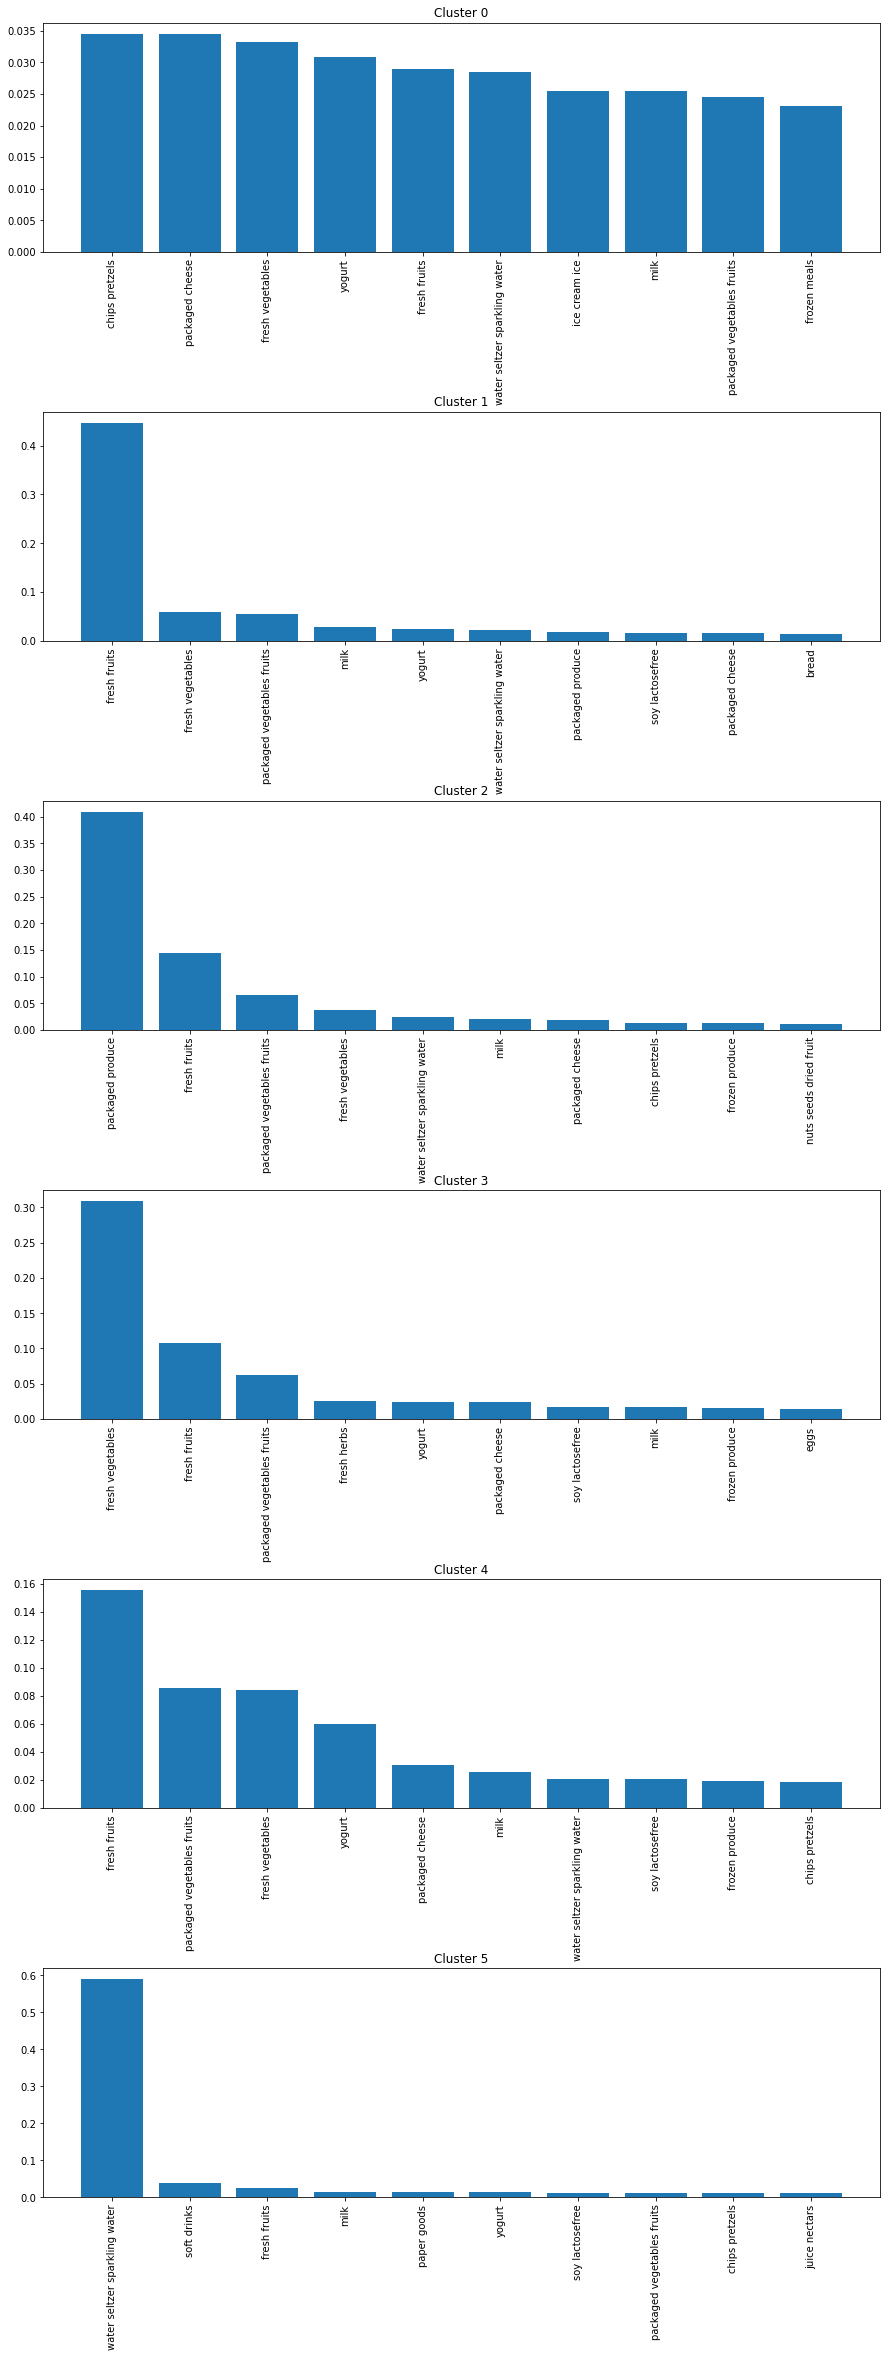

In [31]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6, figsize = (15,40))
fig.subplots_adjust(hspace=.7)
for i in range(6):
    filter_df = percent_cluster[percent_cluster['cluster'] == i].reset_index(drop=True)
    filter_df = filter_df.iloc[0:10]
    axs[i].bar(filter_df['aisle'], filter_df['percent'])
    axs[i].title.set_text(f'Cluster {i}')
    axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

#### Определение 10 лучших продуктов в каждом кластере, преобразование таблицы для подсчета продуктов,
#### подсчёт продуктов в каждом кластере и сортировка кластеров

In [32]:
percent_ct = percent_ct.reset_index(drop=False)
top_cluster = percent_ct[['user_id','cluster']]

cluster_product = order_df[['user_id', 'product_id','product_name','aisle']].merge(top_cluster, on="user_id")
cluster_count = cluster_product.groupby(['cluster','product_name'])['product_id'].count().reset_index(name='count')
cluster_count = cluster_count.sort_values('count',ascending=False)
cluster_list = sorted(cluster_count['cluster'].unique())
inital_df = cluster_count[cluster_count['cluster'] == 0][0:10]

for i in range(1, len(cluster_list)):
    top_df = cluster_count[cluster_count['cluster'] == i][0:10]
    inital_df = pd.concat([inital_df, top_df])
    
cluster_top10 = inital_df
cluster_top10.head()

cluster                product_name  count
2502         0                      Banana   3157
2344         0      Bag of Organic Bananas   1698
22861        0          Organic Whole Milk   1326
29129        0                        Soda   1149
29554        0  Sparkling Water Grapefruit   1110

In [46]:
img = pd.read_csv("product_img.csv")
img.head()

product  \
0                         Chocolate Sandwich Cookies   
1                                   All-Seasons Salt   
2               Robust Golden Unsweetened Oolong Tea   
3  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4                          Green Chile Anytime Sauce   

                                             img_url  
0  https://prods3.imgix.net/images/articles/2016_...  
1  https://www.simplyorganic.com/sites/default/fi...  
2  https://images-na.ssl-images-amazon.com/images...  
3  https://e22d0640933e3c7f8c86-34aee0c49088be50e...  
4  https://embed.widencdn.net/img/mccormick/zh8zn...

In [53]:
cluster_top10['img_url'] = [img.loc[img['product']==item,'img_url'].item() for item in cluster_top10['product_name']]

In [55]:
cluster_top10.to_csv("cluster_top10_img.csv", index=False)

In [34]:
aisle_list = sorted(order_df['aisle'].unique())

In [ ]:
'wb' - записать двоичный файл

In [ ]:
pickle - одна из стандартных библиотек Python, позволяет выполнять сериализацию и десериализацию, работает с потоком байт.
Сериализация - процесс перевода какой-либо структуры данных в последовательность битов. Десериализация является обратной опрерацией и восстанавливает структуры данных из последовательности битов.

In [36]:
import pickle

pickle.dump(pipe,open('kmeansmodel.pkl','wb'))

In [37]:
hello = pickle.load(open('kmeansmodel.pkl','rb'))

In [ ]:
percent_df['user_id']

In [45]:
order = df[df['user_id'] == 1].drop('user_id', axis = 1)
hello.predict(order.to_numpy())[0]

0

In [ ]:
из joblib импорт dump, загрузка dump(kmeans, 'kmeans.joblib')

## Рекомендации и тест

In [ ]:
def recommendations(user_email):
    email = str(user_email)
    # Преобразование электронной почты в user_id
    user_df = pd.read_csv("data/user_df.csv")
    user_id = int(user_df.loc[user_df['email'] == email, 'user_id'])
    order = pd.read_csv("data/order_df.csv")
    order = order[order['user_id'] == user_id].sort_values('add_to_cart_order')
    # Разделение повторных и единовременных заказов
    repeat = order[order['reordered'] > 0]
    nonrepeat = order[order['reordered'] == 0]
    # Прошлые заказы пользователя в формате kmean
    grocery_df = pd.read_csv("data/grocery_df.csv")
    user_order = grocery_df[grocery_df['user_id'] == user_id].drop('user_id', axis = 1)
    # Подогнать user_id к модели, вернуть кластер
    kmeans = load('data/kmeans.joblib') 
    cluster_num = kmeans.predict(user_order.to_numpy())[0]
    cluster_top10 = pd.read_csv("data/cluster_top10_img.csv")
    top10 = cluster_top10[cluster_top10['cluster'] == cluster_num]
    # Установка начальных переменных
    grocery_list = []
    n = 0
    for product in top10['product_name']:
        url_list = top10.loc[top10['product_name']==product, 'img_url']
        repeat_check = repeat[repeat['product_name'] == product]
        nonrepeat_check = nonrepeat[nonrepeat['product_name'] == product]
        if (n==3): break
        elif (not repeat_check.empty):
            grocery_list.append((product,url_list))
            n = n + 1
        elif (not nonrepeat_check.empty):
            grocery_list.append((product,url_list))
            n = n + 1
        else:
            grocery_list.append((product,url_list))
            n = n + 1 
    return grocery_list

In [ ]:
recommendations('user_5@gmail.com')

#### Разделение повторных и единовременных заказов

In [ ]:
order = pd.read_csv("order_df.csv")
order = order[order['user_id'] == 8].sort_values('add_to_cart_order')
repeat = order[order['reordered'] > 0]
repeat

### Создание рекомендательной функции

In [ ]:
def recommendations(user_email):
    email = str(user_email)
    # Преобразование электронной почты в user_id
    user_df = pd.read_csv("user_df.csv")
    user_id = int(user_df.loc[user_df['email'] == email, 'user_id'])
    order = pd.read_csv("order_df.csv")
    order = order[order['user_id'] == user_id].sort_values('add_to_cart_order')
    # Разделение повторных и единовременных заказов
    repeat = order[order['reordered'] > 0]
    nonrepeat = order[order['reordered'] == 0]
    # Прошлые заказы пользователя в формате kmean
    grocery_df = pd.read_csv("grocery_df.csv")
    user_order = grocery_df[grocery_df['user_id'] == user_id].drop('user_id', axis = 1)
    # Подогнать user_id к модели, вернуть кластер 
    kmeans = load('data/kmeans.joblib') 
    cluster_num = kmeans.predict(user_order.to_numpy())[0]
    cluster_top10 = pd.read_csv("cluster_top10_img.csv")
    top10 = cluster_top10[cluster_top10['cluster'] == cluster_num]
    # Установка начальных переменных
    n = 0
    grocery_list=[]
    for product in repeat['product_name']:
        top10_check = top10[top10['product_name'] == product]
        if (n == 3): break
        elif (not top10_check.empty):
            url_list = top10.loc[top10['product_name'] == product].img_url.item()
            grocery_list.append({'product': product, 'img': url_list})
            n = n + 1
    for product in nonrepeat['product_name']:
        nonrepeat_check = nonrepeat[nonrepeat['product_name'] == product]
        if (n == 3): break
        elif (not nonrepeat_check.empty):
            url_list = top10.loc[top10['product_name'] == product].img_url.item()
            grocery_list.append({'product': product, 'img': url_list})
            n = n + 1
    for product in repeat['product_name']:
        if (n == 3): break
        else:
            url_list = top10.loc[top10['product_name'] == product].img_url.item()
            grocery_list.append({'product': product, 'img': url_list})
            n = n + 1
    return grocery_list

In [ ]:
cluster_top10 = pd.read_csv("cluster_top10_img.csv")
top10 = cluster_top10[cluster_top10['cluster'] == 3]
top10.loc[top10['product_name'] == 'Banana'].img_url.item()

In [ ]:
recommendations('user_8@gmail.com')

In [ ]:
server = "grocery.cu51j1bqdgvr.us-east-2.rds.amazonaws.com"
database = "postgres"
port = "5432"
username = "postgres"
password = "postgres123"
conn = f"postgres://{username}:{password}@{server}:{port}/{database}"
import pandas as pd
final_df = pd.read_sql_table("user_df", conn)
final_df.head()

In [ ]:
from joblib import dump, load
kmeans = load('data/kmeans.joblib')


In [ ]:
order= pd.read_csv('data/grocery_df.csv')
order.head()

In [ ]:
import images_webscraping.ipy

In [ ]:
order_df.head()

In [ ]:
products[products['product_name']=='All Natural Thai Dumplings']

### Вывод: 
#### Мы выяснили актуальность и важность реализации рекомендательной системы под бизнес-задачу (ритейл) и реализовали её. 
#### Рекомендательные системы в ритейле помогают посетителям выбрать подходящие товары и экономят их время, а продавцы получают дополнительную выручку и лояльных покупателей.
#### В основе рекомендательных систем лежит обработка накопленной информации о посетителях, покупателях и товарах. За счёт рекомендательной системы прибыль компании быстро растёт.
#### Используя кластеризацию клиентов, можно получить четкую систему рекомендаций для персонала — какой товар, какому клиенту и в какое время предлагать.
#### Зная, что и какой группе людей предлагать, компании смогут избежать метода “ковровой бомбардировки” при sms или e-mail рассылке или как у нас рекомендации на сайте